# Exploratory Data Analysis-Terrorism

Import libraries

In [65]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default="png"

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

Import dataset

In [66]:
df= pd.read_csv(r"C:\Users\STARTPC\Desktop\Data Scienc\globalterrorismdb_0718dist.csv")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [67]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

**Analyze in which year Attacks and Kills are highest**

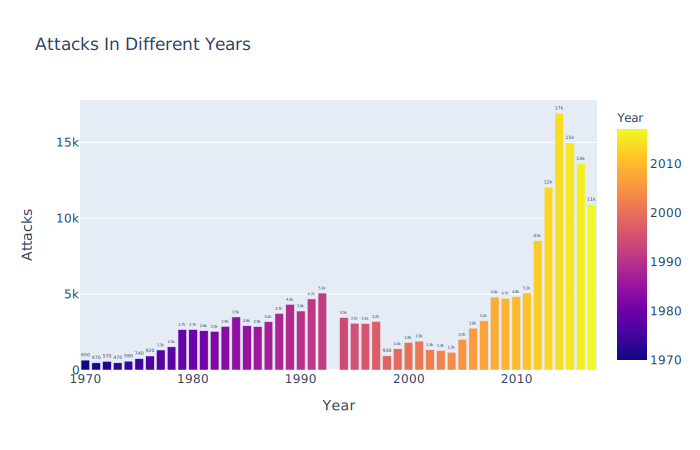

In [68]:
data_y1=pd.DataFrame(df['iyear'].value_counts())
fig=px.bar(data_y1,x=data_y1.index,y='iyear',text='iyear',color=data_y1.index,labels={'index':'Year','iyear':'Attacks'},title='Attacks In Different Years')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

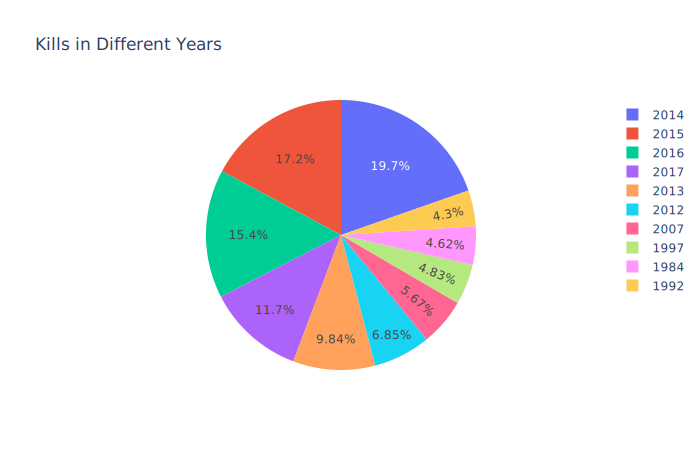

In [69]:
data=df[['iyear', 'imonth', 'iday','country', 'country_txt', 'region', 'region_txt','nkill']]
data_y2=data.groupby(by='iyear')['nkill'].sum().reset_index()
data_y2=data_y2.sort_values(by=['nkill'],ascending=False)[:10]
fig=px.pie(data_y2,values='nkill',names='iyear',title='Kills in Different Years',
             hover_data=['nkill'], labels={'iyear':'Year','nkill':'Kills'})
fig.show("svg")

 Highest number of attacks and kills are in **Year 2014**

**Analyze which country have Highest number of Attacks and Kills**

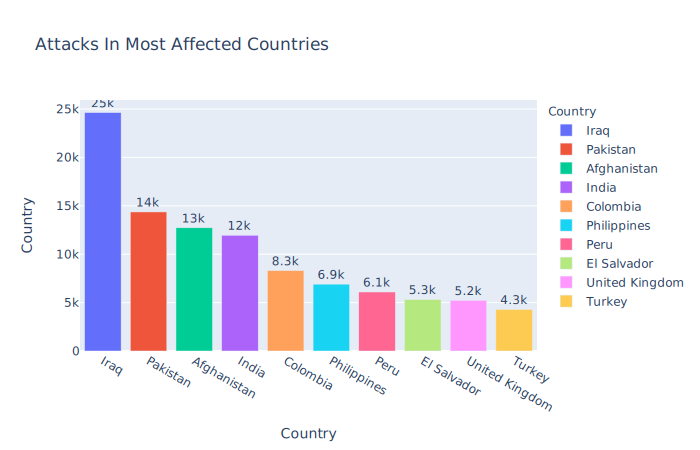

In [70]:
data_c1=pd.DataFrame(df['country_txt'].value_counts()).head(10)
fig=px.bar(data_c1,x=data_c1.index,y='country_txt',text='country_txt',color=data_c1.index,labels={'index':'Country','country_txt':'Country'},title='Attacks In Most Affected Countries',width=1000,height=500)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

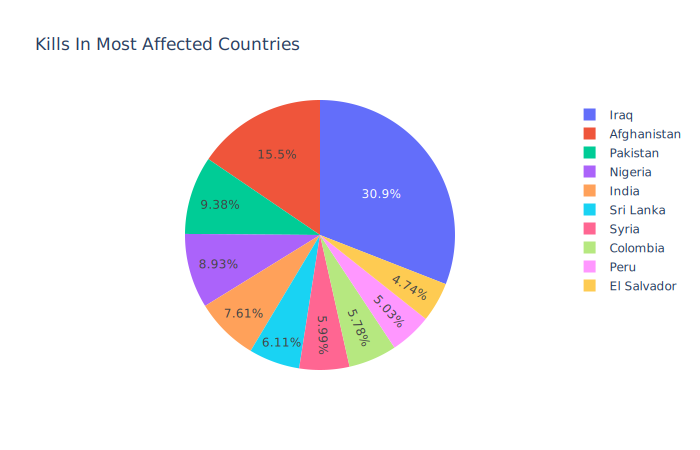

In [71]:
data_c2=data.groupby(by='country_txt')['nkill'].sum().reset_index()
data_c2=data_c2.sort_values(by=['nkill'],ascending=False)[:10]
fig=px.pie(data_c2,values='nkill',names='country_txt',title='Kills In Most Affected Countries ',
             hover_data=['nkill'], labels={'country_txt':'Country','nkill':'Kills'})
fig.show("svg")

**Iraq** is the country with highest number of attacks and kill

**Analyze which Region have highest number of attacks and kill** 

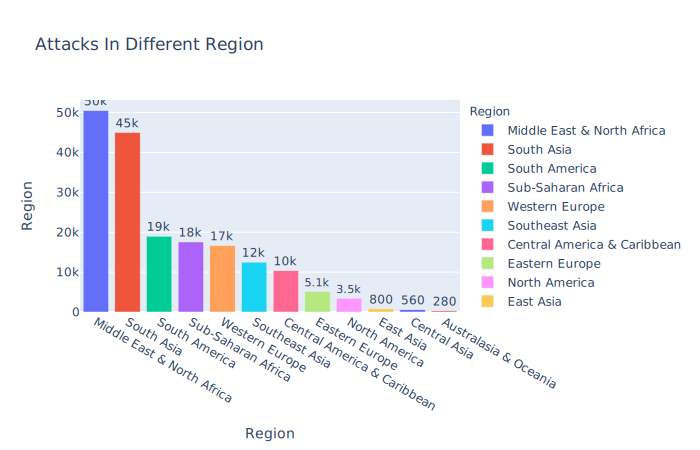

In [72]:
data_r1=pd.DataFrame(df['region_txt'].value_counts())
fig=px.bar(data_r1,x=data_r1.index,y='region_txt',text='region_txt',color=data_r1.index,labels={'index':'Region','region_txt':'Region'},title='Attacks In Different Region',width=1000,height=700)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

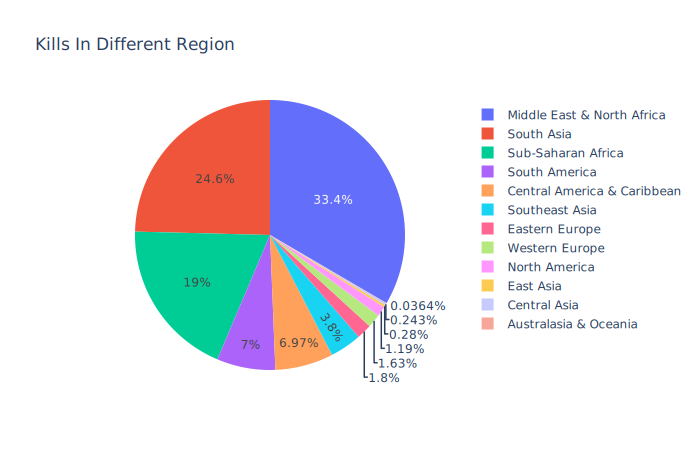

In [73]:
data_r2=data.groupby(by='region_txt')['nkill'].sum().reset_index()
data_r2=data_r2.sort_values(by=['nkill'],ascending=False)
fig=px.pie(data_r2,values='nkill',names='region_txt',title='Kills In Different Region ',
             hover_data=['nkill'], labels={'region_txt':'Region','nkill':'Kills'})
fig.show("svg")

**Middle East & North Africa** is the most attacked and killed targets region

**Analyze City with Highest number of Attack and Kills**

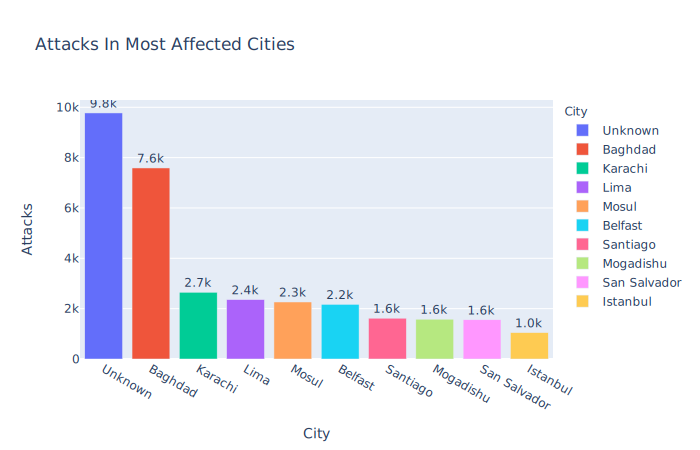

In [74]:
data_ci1=pd.DataFrame(df['city'].value_counts()).head(10)
fig=px.bar(data_ci1,x=data_ci1.index,y='city',text='city',color=data_ci1.index,labels={'index':'City','city':'Attacks'},title='Attacks In Most Affected Cities',width=1000,height=700)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

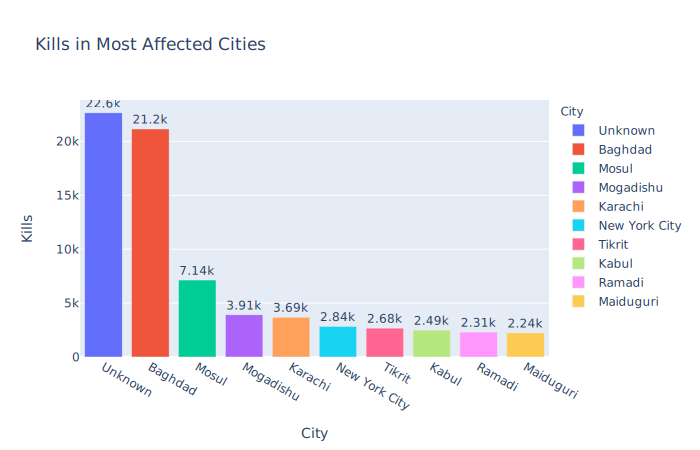

In [75]:
data_ci2=df.loc[:,['nkill','city']].fillna(0)
data_ci2= data_ci2.groupby(by='city')['nkill'].sum().reset_index().sort_values(by=['nkill'],ascending=False)[:10]
fig=px.bar(data_ci2,x='city',y='nkill',text='nkill',color='city',labels={'city':'City','nkill':'Kills'},title='Kills in Most Affected Cities')
fig.update_traces(texttemplate='%{text:.3s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

**Baghdad** is the city most Attacked and Kills

**Analyze with Attack type is prominent in Attacks**

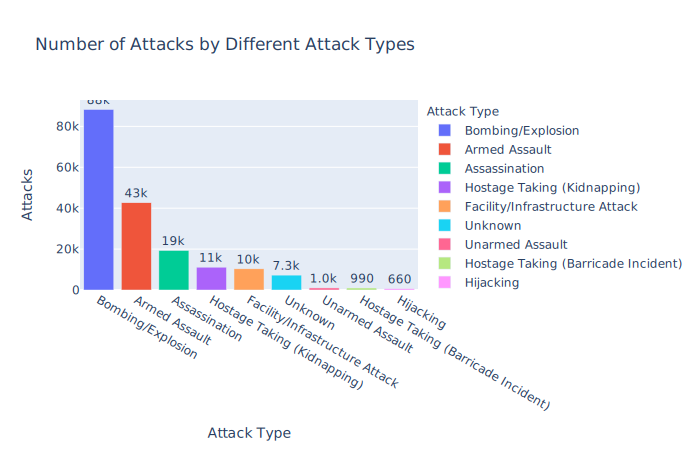

In [76]:
data_a1=pd.DataFrame(df['attacktype1_txt'].value_counts()).head(10)
fig=px.bar(data_a1,x=data_a1.index,y='attacktype1_txt',text='attacktype1_txt',color=data_a1.index,labels={'index':'Attack Type','attacktype1_txt':'Attacks'},title='Number of Attacks by Different Attack Types',height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

Most of the Attacks are **Bombing and Explosion**

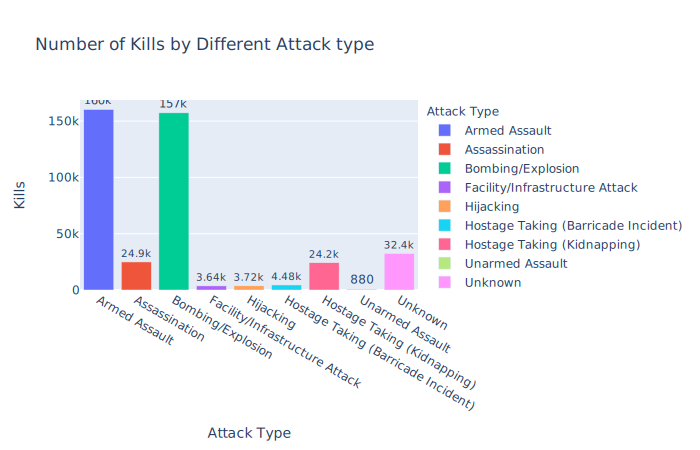

In [77]:
killData = df.loc[:,'nkill']
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
Attack_type=pd.concat([attackData, killData], axis=1)
Attack_type=Attack_type.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum').transpose().reset_index()


fig=px.bar(Attack_type,x='attacktype1_txt',y='nkill',text='nkill',color='attacktype1_txt',labels={'attacktype1_txt':'Attack Type','nkill':'Kills'},title='Number of Kills by Different Attack type',height=600)
fig.update_traces(texttemplate='%{text:.3s}',textposition='outside')
fig.update_layout(uniformtext_minsize=10)
fig.show("svg")

**Armed Assault** cause Highest Number of Kills

**Analyze the Targets which suffer Highest Attacks and Kills**

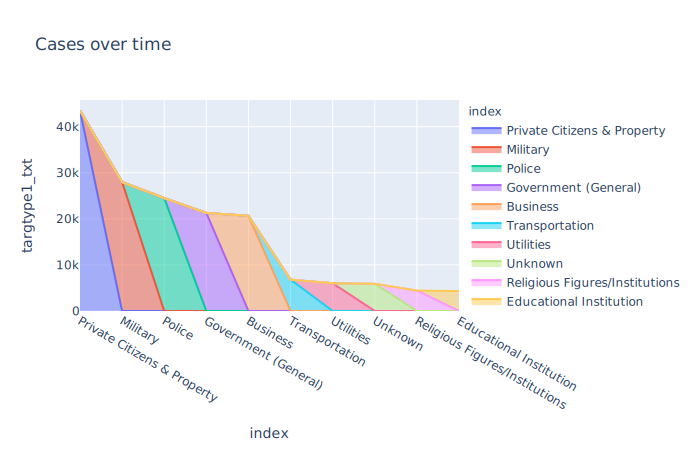

In [117]:
data_t1=pd.DataFrame(df['targtype1_txt'].value_counts()).head(10)
fig =px.area(data_t1, x=data_t1.index,y='targtype1_txt',color=data_t1.index,height=600,title='Cases over time')
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show("svg")

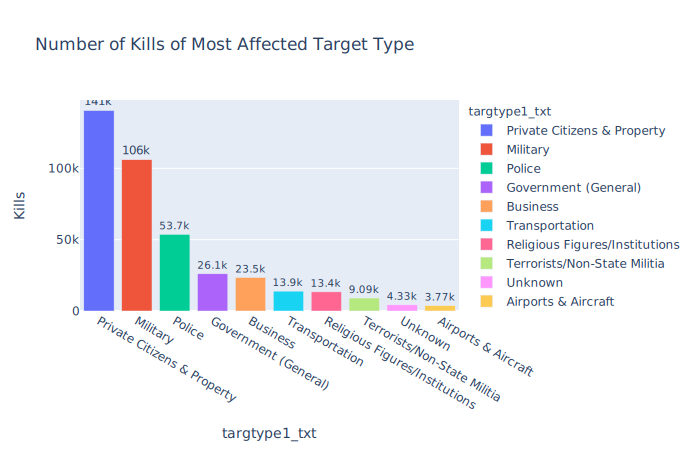

In [113]:
killData = df.loc[:,'nkill']
TargetData = df.loc[:,'targtype1':'targtype1_txt']
data_t2=pd.concat([TargetData, killData], axis=1)
data_t2=data_t2.pivot_table(columns='targtype1_txt', values='nkill', aggfunc='sum').transpose().reset_index().sort_values(by=['nkill'],ascending=False)[:10]


fig=px.bar(data_t2,x='targtype1_txt',y='nkill',text='nkill',color='targtype1_txt',labels={'tar4type1_txt':'Target Type','nkill':'Kills'},height=1500,title='Number of Kills of Most Affected Target Type')
fig.update_traces(texttemplate='%{text:.3s}',textposition='outside')
fig.update_layout(uniformtext_minsize=1)
fig.show("svg")

**Private Citizens & Property** is the most Attacked and Killed targets 

**Analyze which terrorist group cause highest Attacks and Kills**

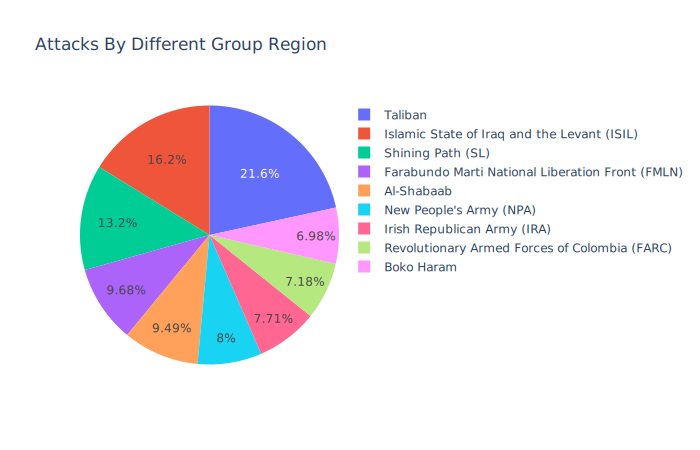

In [80]:
data_g1=pd.DataFrame(df['gname'].value_counts()).head(10)
data_g1=data_g1.drop('Unknown')

fig=px.pie(data_g1,values='gname',names=data_g1.index,title='Attacks By Different Group Region ',
             hover_data=['gname'], labels={'gname':'Group'})
fig.show("svg")

**Taliban** cause highest number of Attacks

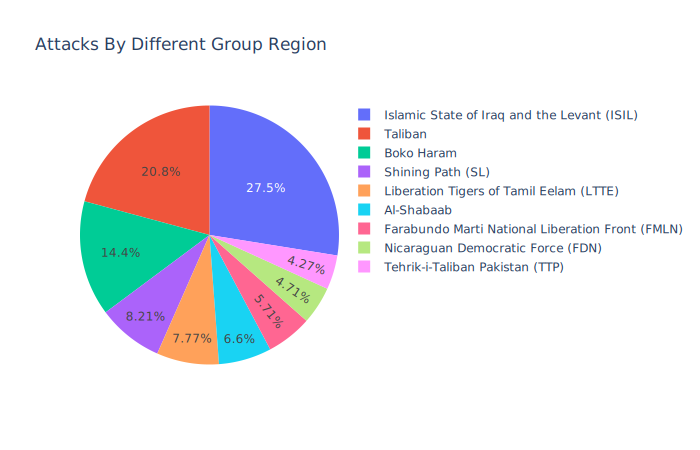

In [129]:
killData = df.loc[:,'nkill']
GroupData = df.loc[:,'gname']
Group_type=pd.concat([GroupData, killData], axis=1)
Group_type=Group_type.pivot_table(columns='gname', values='nkill', aggfunc='sum').transpose().reset_index().sort_values(by=['nkill'],ascending=False)[:10]
Group_type=Group_type[1:]
fig=px.pie(Group_type,values='nkill',names='gname',title='Attacks By Different Group Region ',
             hover_data=['gname'], labels={'gname':'Group Type','nkill':'Kills'})
fig.show("svg")

**Islamic State of Iraq and the Levant(ISIL)** cause highest number of Kills.

# Hot Zones of attacks in different years

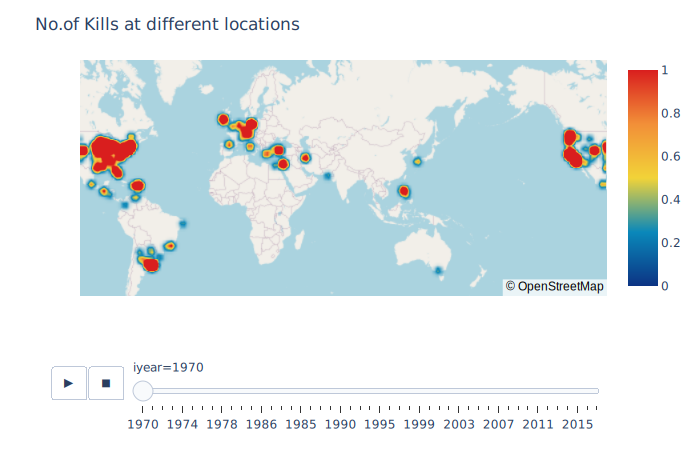

In [82]:
df[['nwound','nkill']]=df[['nwound','nkill']].fillna(0)

fig=px.density_mapbox(df, lat='latitude', lon='longitude',hover_name='country_txt',hover_data=['city','nwound','nkill'],animation_frame='iyear' , color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='No.of Kills at different locations')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=78)
fig.show("svg")

# Result and Conclusion

1.Year with most Attacks and Kills is **'2014'**

2.Country with highest Attacks and Kills is **'Iraq'**

3.Region with highest Attacks and Kills is **'Middle East and North Africa'**

4.City with highest Attacks and Kills is **'Baghdad'**

5.Highest Number of Attacks are of **'Bombing/Explosion'** Attack type

6.Highest Number of Kills is due to **'Armed Assault'** Attack type

7.Most Attacked and Killed Targets are **'Private Citizen and Property'**

8.Highest Number of Attacks by **'Taliban'** Group

9.Highest Number of kills by **'Islamic State of Iraq and the Levant(ISIL)'** Group
